# Data Analysis

Importing the required packages:

- [pandas](https://pandas.pydata.org/)
- [requests](https://requests.readthedocs.io/en/master/)

In [1]:
import pandas
import requests

In the first example, we'll use the **WHOSIS_000001**, whose information can be seen by running the following code:

In [2]:
response = requests.get("https://ghoapi.azureedge.net/api/Indicator?$filter=IndicatorCode eq 'WHOSIS_000001'")
response.json()

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#Indicator',
 'value': [{'IndicatorCode': 'WHOSIS_000001',
   'IndicatorName': 'Life expectancy at birth (years)',
   'Language': 'EN'}]}

First, we'll get the all available data for the indicator:

In [3]:
response = requests.get("https://ghoapi.azureedge.net/api/WHOSIS_000001")
response.json()

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#WHOSIS_000001',
 'value': [{'Id': 15578241,
   'IndicatorCode': 'WHOSIS_000001',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'RWA',
   'TimeDimType': 'YEAR',
   'TimeDim': 2000,
   'Dim1Type': 'SEX',
   'Dim1': 'MLE',
   'Dim2Type': None,
   'Dim2': None,
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '43.0',
   'NumericValue': 42.99474,
   'Low': None,
   'High': None,
   'Comments': None,
   'Date': '2017-03-31T08:14:36.203+02:00'},
  {'Id': 15578243,
   'IndicatorCode': 'WHOSIS_000001',
   'SpatialDimType': 'COUNTRY',
   'SpatialDim': 'RWA',
   'TimeDimType': 'YEAR',
   'TimeDim': 2000,
   'Dim1Type': 'SEX',
   'Dim1': 'FMLE',
   'Dim2Type': None,
   'Dim2': None,
   'Dim3Type': None,
   'Dim3': None,
   'DataSourceDimType': None,
   'DataSourceDim': None,
   'Value': '48.4',
   'NumericValue': 48.38779,
   'Low': None,
   'High': None,
   'Comments': None,


and extract the list of records for later use:

In [4]:
records = response.json()['value']

We use the [pandas.DataFrom.from_records()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_records.html) method to create a DataFrame from the records

In [5]:
df = pandas.DataFrame.from_records(records)
df

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date
0,15578241,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,MLE,None,None,None,None,None,None,43.0,42.99474,None,None,None,2017-03-31T08:14:36.203+02:00
1,15578243,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,FMLE,None,None,None,None,None,None,48.4,48.38779,None,None,None,2017-03-31T08:14:36.36+02:00
2,15578245,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,BTSX,None,None,None,None,None,None,45.7,45.70058,None,None,None,2017-03-31T08:14:36.453+02:00
3,15578247,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,MLE,None,None,None,None,None,None,43.5,43.48892,None,None,None,2017-03-31T08:14:36.58+02:00
4,15578249,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,FMLE,None,None,None,None,None,None,49.5,49.49390,None,None,None,2017-03-31T08:14:36.687+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,18181850,WHOSIS_000001,REGION,WPR,YEAR,2000,SEX,BTSX,None,None,None,None,None,None,72.8,72.80718,None,None,None,2018-04-06T10:50:13.8+02:00
9482,18181851,WHOSIS_000001,REGION,WPR,YEAR,2005,SEX,BTSX,None,None,None,None,None,None,74.7,74.68253,None,None,None,2018-04-06T10:50:13.82+02:00
9483,18181852,WHOSIS_000001,REGION,WPR,YEAR,2010,SEX,BTSX,None,None,None,None,None,None,75.8,75.77744,None,None,None,2018-04-06T10:50:13.84+02:00
9484,18181853,WHOSIS_000001,REGION,WPR,YEAR,2015,SEX,BTSX,None,None,None,None,None,None,76.7,76.70511,None,None,None,2018-04-06T10:50:13.857+02:00


We can use the [.info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method get get some basic information about the data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 20 columns):
Id                   9486 non-null int64
IndicatorCode        9486 non-null object
SpatialDimType       9486 non-null object
SpatialDim           9486 non-null object
TimeDimType          9486 non-null object
TimeDim              9486 non-null int64
Dim1Type             9486 non-null object
Dim1                 9486 non-null object
Dim2Type             0 non-null object
Dim2                 0 non-null object
Dim3Type             0 non-null object
Dim3                 0 non-null object
DataSourceDimType    0 non-null object
DataSourceDim        0 non-null object
Value                9486 non-null object
NumericValue         9486 non-null float64
Low                  0 non-null object
High                 0 non-null object
Comments             9333 non-null object
Date                 9486 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.4+ MB


as well as its [.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html):

In [7]:
df.shape

(9486, 20)

We'll make sure to remove any duplicates by running [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(9486, 20)

Let's calculate to total number of nulls in each column of our dataset.

The first step is to check which cells in our DataFrame are null:

In [9]:
df.isnull()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,Dim1Type,Dim1,Dim2Type,Dim2,Dim3Type,Dim3,DataSourceDimType,DataSourceDim,Value,NumericValue,Low,High,Comments,Date
0,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
2,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9481,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
9482,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
9483,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False
9484,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,True,True,True,False


To count the number of nulls in each column we use an aggregate function for summing:

In [10]:
df.isnull().sum()

Id                      0
IndicatorCode           0
SpatialDimType          0
SpatialDim              0
TimeDimType             0
TimeDim                 0
Dim1Type                0
Dim1                    0
Dim2Type             9486
Dim2                 9486
Dim3Type             9486
Dim3                 9486
DataSourceDimType    9486
DataSourceDim        9486
Value                   0
NumericValue            0
Low                  9486
High                 9486
Comments              153
Date                    0
dtype: int64

We'll drop the columns with null values by using `dropna()` and setting `axis=1`:

In [11]:
df.dropna(axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9486 entries, 0 to 9485
Data columns (total 11 columns):
Id                9486 non-null int64
IndicatorCode     9486 non-null object
SpatialDimType    9486 non-null object
SpatialDim        9486 non-null object
TimeDimType       9486 non-null object
TimeDim           9486 non-null int64
Dim1Type          9486 non-null object
Dim1              9486 non-null object
Value             9486 non-null object
NumericValue      9486 non-null float64
Date              9486 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 889.3+ KB


Rename the columns to be used:

In [12]:
df.rename(columns={
    'Id': 'id', 
    'IndicatorCode': 'code',
    'SpatialDimType': 'spatial_dimension_type',
    'SpatialDim': 'spatial_dimension',
    'TimeDimType': 'time_dimension_type',
    'TimeDim': 'time_dimension',
    'Dim1Type': 'extra_dimension_type',
    'Dim1': 'extra_dimension',
    'Value': 'value',
    'NumericValue': 'value_numeric',
    'Date': 'date',
}, inplace=True)
df.columns

Index(['id', 'code', 'spatial_dimension_type', 'spatial_dimension',
       'time_dimension_type', 'time_dimension', 'extra_dimension_type',
       'extra_dimension', 'value', 'value_numeric', 'date'],
      dtype='object')

Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [13]:
df.describe()

,id,time_dimension,value_numeric
count,9.486000e+03,9486.000000,9486.000000
mean,1.814859e+07,2008.010753,69.101396
std,1.833449e+05,4.913730,9.382723
min,1.557824e+07,2000.000000,33.227470
25%,1.815896e+07,2004.000000,62.784467
50%,1.816147e+07,2008.000000,71.060850
75%,1.816398e+07,2012.000000,76.213930
max,1.818185e+07,2016.000000,87.145020


`.describe()` can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category:

In [14]:
df['spatial_dimension'].describe()

count     9486
unique     190
top        RWA
freq        99
Name: spatial_dimension, dtype: object

In [15]:
df['extra_dimension'].describe()

count     9486
unique       3
top        MLE
freq      3162
Name: extra_dimension, dtype: object

`.value_counts()` can tell us the frequency of all values in a column:

In [16]:
df['spatial_dimension'].value_counts().head(10)

RWA    99
ATG    51
KGZ    51
USA    51
AUS    51
MUS    51
OMN    51
CHL    51
BGD    51
SWE    51
Name: spatial_dimension, dtype: int64

By using the correlation method `.corr()` we can generate the relationship between each continuous variable:

In [17]:
df.corr()

,id,time_dimension,value_numeric
id,1.000000,0.007736,0.090730
time_dimension,0.007736,1.000000,0.188926
value_numeric,0.090730,0.188926,1.000000


Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. 1.0 indicates a perfect correlation.

We can see here that the highest correlation is time/ value with ~0.2, not very strong...

To get the first record of the set, we simply do:

In [18]:
record = df.iloc[1]
record

id                                            15578243
code                                     WHOSIS_000001
spatial_dimension_type                         COUNTRY
spatial_dimension                                  RWA
time_dimension_type                               YEAR
time_dimension                                    2000
extra_dimension_type                               SEX
extra_dimension                                   FMLE
value                                             48.4
value_numeric                                  48.3878
date                      2017-03-31T08:14:36.36+02:00
Name: 1, dtype: object

Or to get a subset of records (first 4 records):

In [19]:
records = df.iloc[1:4]
records

,id,code,spatial_dimension_type,spatial_dimension,time_dimension_type,time_dimension,extra_dimension_type,extra_dimension,value,value_numeric,date
1,15578243,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,FMLE,48.4,48.38779,2017-03-31T08:14:36.36+02:00
2,15578245,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,BTSX,45.7,45.70058,2017-03-31T08:14:36.453+02:00
3,15578247,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,MLE,43.5,43.48892,2017-03-31T08:14:36.58+02:00


Or filter the records, for example, by country:

In [20]:
rwa_records = df[df['spatial_dimension'] == 'RWA']
rwa_records

,id,code,spatial_dimension_type,spatial_dimension,time_dimension_type,time_dimension,extra_dimension_type,extra_dimension,value,value_numeric,date
0,15578241,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,MLE,43.0,42.99474,2017-03-31T08:14:36.203+02:00
1,15578243,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,FMLE,48.4,48.38779,2017-03-31T08:14:36.36+02:00
2,15578245,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,BTSX,45.7,45.70058,2017-03-31T08:14:36.453+02:00
3,15578247,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,MLE,43.5,43.48892,2017-03-31T08:14:36.58+02:00
4,15578249,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,FMLE,49.5,49.49390,2017-03-31T08:14:36.687+02:00
...,...,...,...,...,...,...,...,...,...,...,...
7183,18164050,WHOSIS_000001,COUNTRY,RWA,YEAR,2012,SEX,BTSX,66.0,65.99725,2018-04-06T10:41:41.577+02:00
7184,18164051,WHOSIS_000001,COUNTRY,RWA,YEAR,2013,SEX,BTSX,66.7,66.65292,2018-04-06T10:41:41.603+02:00
7185,18164052,WHOSIS_000001,COUNTRY,RWA,YEAR,2014,SEX,BTSX,67.2,67.16670,2018-04-06T10:41:41.63+02:00
7186,18164053,WHOSIS_000001,COUNTRY,RWA,YEAR,2015,SEX,BTSX,67.6,67.61581,2018-04-06T10:41:41.653+02:00


In [21]:
country_set_records = df[df['spatial_dimension'].isin(['RWA', 'WPR'])]
country_set_records

,id,code,spatial_dimension_type,spatial_dimension,time_dimension_type,time_dimension,extra_dimension_type,extra_dimension,value,value_numeric,date
0,15578241,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,MLE,43.0,42.99474,2017-03-31T08:14:36.203+02:00
1,15578243,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,FMLE,48.4,48.38779,2017-03-31T08:14:36.36+02:00
2,15578245,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,BTSX,45.7,45.70058,2017-03-31T08:14:36.453+02:00
3,15578247,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,MLE,43.5,43.48892,2017-03-31T08:14:36.58+02:00
4,15578249,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,FMLE,49.5,49.49390,2017-03-31T08:14:36.687+02:00
...,...,...,...,...,...,...,...,...,...,...,...
9481,18181850,WHOSIS_000001,REGION,WPR,YEAR,2000,SEX,BTSX,72.8,72.80718,2018-04-06T10:50:13.8+02:00
9482,18181851,WHOSIS_000001,REGION,WPR,YEAR,2005,SEX,BTSX,74.7,74.68253,2018-04-06T10:50:13.82+02:00
9483,18181852,WHOSIS_000001,REGION,WPR,YEAR,2010,SEX,BTSX,75.8,75.77744,2018-04-06T10:50:13.84+02:00
9484,18181853,WHOSIS_000001,REGION,WPR,YEAR,2015,SEX,BTSX,76.7,76.70511,2018-04-06T10:50:13.857+02:00


Or by age:

In [22]:
over_70_records = df[df['value_numeric'] >= 70]
over_70_records

,id,code,spatial_dimension_type,spatial_dimension,time_dimension_type,time_dimension,extra_dimension_type,extra_dimension,value,value_numeric,date
150,18156604,WHOSIS_000001,COUNTRY,ALB,YEAR,2000,SEX,MLE,70.4,70.42431,2018-04-06T10:38:33.987+02:00
151,18156605,WHOSIS_000001,COUNTRY,ALB,YEAR,2001,SEX,MLE,71.6,71.59666,2018-04-06T10:38:34.003+02:00
152,18156606,WHOSIS_000001,COUNTRY,ALB,YEAR,2002,SEX,MLE,71.4,71.38121,2018-04-06T10:38:34.027+02:00
153,18156607,WHOSIS_000001,COUNTRY,ALB,YEAR,2003,SEX,MLE,70.8,70.83972,2018-04-06T10:38:34.047+02:00
154,18156608,WHOSIS_000001,COUNTRY,ALB,YEAR,2004,SEX,MLE,71.0,71.00983,2018-04-06T10:38:34.067+02:00
...,...,...,...,...,...,...,...,...,...,...,...
9481,18181850,WHOSIS_000001,REGION,WPR,YEAR,2000,SEX,BTSX,72.8,72.80718,2018-04-06T10:50:13.8+02:00
9482,18181851,WHOSIS_000001,REGION,WPR,YEAR,2005,SEX,BTSX,74.7,74.68253,2018-04-06T10:50:13.82+02:00
9483,18181852,WHOSIS_000001,REGION,WPR,YEAR,2010,SEX,BTSX,75.8,75.77744,2018-04-06T10:50:13.84+02:00
9484,18181853,WHOSIS_000001,REGION,WPR,YEAR,2015,SEX,BTSX,76.7,76.70511,2018-04-06T10:50:13.857+02:00


In [23]:
lowest_quantile_records = df[df['value_numeric'] < df['value_numeric'].quantile(0.25)]
lowest_quantile_records

,id,code,spatial_dimension_type,spatial_dimension,time_dimension_type,time_dimension,extra_dimension_type,extra_dimension,value,value_numeric,date
0,15578241,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,MLE,43.0,42.99474,2017-03-31T08:14:36.203+02:00
1,15578243,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,FMLE,48.4,48.38779,2017-03-31T08:14:36.36+02:00
2,15578245,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,BTSX,45.7,45.70058,2017-03-31T08:14:36.453+02:00
3,15578247,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,MLE,43.5,43.48892,2017-03-31T08:14:36.58+02:00
4,15578249,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,FMLE,49.5,49.49390,2017-03-31T08:14:36.687+02:00
...,...,...,...,...,...,...,...,...,...,...,...
9451,18181820,WHOSIS_000001,REGION,AFR,YEAR,2000,SEX,BTSX,50.8,50.82056,2018-04-06T10:50:13.177+02:00
9452,18181821,WHOSIS_000001,REGION,AFR,YEAR,2005,SEX,BTSX,53.4,53.35171,2018-04-06T10:50:13.2+02:00
9453,18181822,WHOSIS_000001,REGION,AFR,YEAR,2010,SEX,BTSX,57.6,57.62591,2018-04-06T10:50:13.223+02:00
9454,18181823,WHOSIS_000001,REGION,AFR,YEAR,2015,SEX,BTSX,60.7,60.69231,2018-04-06T10:50:13.247+02:00


We can also apply a function to filter the records:

In [24]:
def age_function(x):
    if x <= 65:
        return 'YOUNG'
    else:
        return 'OLD'

In [25]:
df['age_rating'] = df['value_numeric'].apply(age_function)
df

,id,code,spatial_dimension_type,spatial_dimension,time_dimension_type,time_dimension,extra_dimension_type,extra_dimension,value,value_numeric,date,age_rating
0,15578241,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,MLE,43.0,42.99474,2017-03-31T08:14:36.203+02:00,YOUNG
1,15578243,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,FMLE,48.4,48.38779,2017-03-31T08:14:36.36+02:00,YOUNG
2,15578245,WHOSIS_000001,COUNTRY,RWA,YEAR,2000,SEX,BTSX,45.7,45.70058,2017-03-31T08:14:36.453+02:00,YOUNG
3,15578247,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,MLE,43.5,43.48892,2017-03-31T08:14:36.58+02:00,YOUNG
4,15578249,WHOSIS_000001,COUNTRY,RWA,YEAR,2001,SEX,FMLE,49.5,49.49390,2017-03-31T08:14:36.687+02:00,YOUNG
...,...,...,...,...,...,...,...,...,...,...,...,...
9481,18181850,WHOSIS_000001,REGION,WPR,YEAR,2000,SEX,BTSX,72.8,72.80718,2018-04-06T10:50:13.8+02:00,OLD
9482,18181851,WHOSIS_000001,REGION,WPR,YEAR,2005,SEX,BTSX,74.7,74.68253,2018-04-06T10:50:13.82+02:00,OLD
9483,18181852,WHOSIS_000001,REGION,WPR,YEAR,2010,SEX,BTSX,75.8,75.77744,2018-04-06T10:50:13.84+02:00,OLD
9484,18181853,WHOSIS_000001,REGION,WPR,YEAR,2015,SEX,BTSX,76.7,76.70511,2018-04-06T10:50:13.857+02:00,OLD


We can now chart the data to get a better visualization of it:

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

To plot a scatter chart:

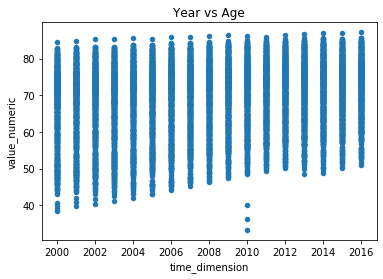

In [27]:
df.plot(kind='scatter', x='time_dimension', y='value_numeric', title='Year vs Age');

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

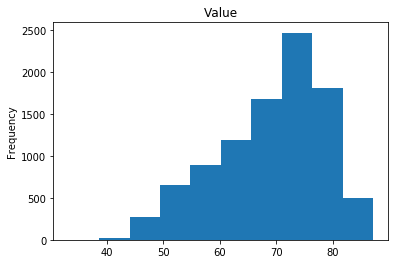

In [28]:
df['value_numeric'].plot(kind='hist', title='Value');

Using a Boxplot we can visualize this data:

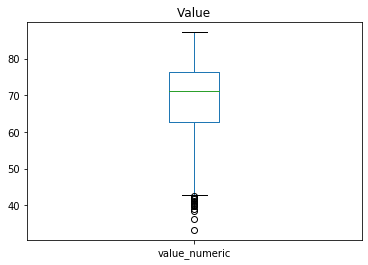

In [29]:
df['value_numeric'].plot(kind='box', title='Value');